# Loading Dataset, cleaning and Preprocessing it.

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/diabetes.data.txt', delimiter='\t')

# Display the first few rows to understand what the data looks like
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


Description:
AGE: The age of the patient.

SEX: The sex of the patient, 1 for male and 2 for female.

BMI: Body Mass Index, a key indicator of obesity, calculated as weight in kilograms divided by the square of height in meters.

BP: Blood pressure measurement, typically the average of several readings; high blood pressure is a risk factor for diabetes.

S1, S2, S3, S4, S5, S6: These columns typically represent various blood serum measurements.

Y: The target variable, representing a quantitative measure of disease progression one year after the baseline. This could be a specific marker of diabetes severity or complication rate, depending on the study's focus.

# Checking for missing values

In [3]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

missing_values

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

# Checking for outliers

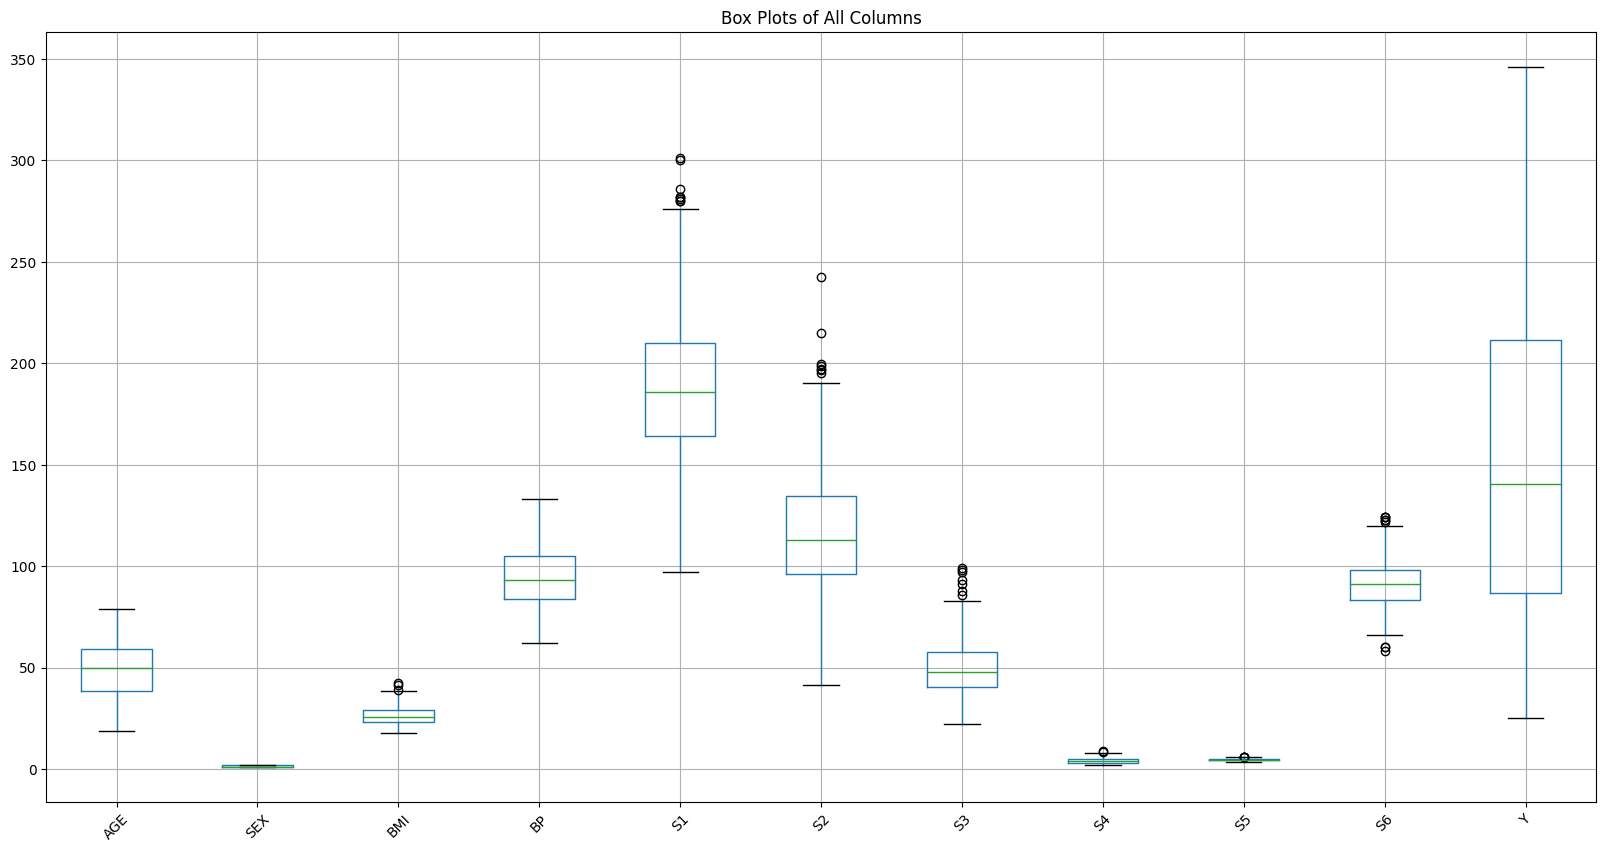

In [4]:
import matplotlib.pyplot as plt

# Creating box plots for all columns
plt.figure(figsize=(20, 10))
df.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plots of All Columns')
plt.show()

# Info of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


# Removing Outliers

In [7]:
# Calculate Q1, Q3, and IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Shapes of original and cleaned dataframes
original_shape = df.shape
cleaned_shape = df_cleaned.shape

original_shape, cleaned_shape


((442, 11), (411, 11))

# Descriptive Statitics

In [8]:
# descriptive statistics
descriptive_stats = df_cleaned.describe()

descriptive_stats


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,48.508516,1.472019,26.238686,94.573358,186.136253,113.939903,49.361314,4.010487,4.609337,90.819951,149.970803
std,13.268955,0.499825,4.230209,13.545239,31.903298,28.215258,11.784818,1.199415,0.498947,10.688799,75.772954
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,66.000000,25.000000
25%,39.000000,1.000000,23.200000,85.000000,163.000000,96.000000,41.000000,3.000000,4.262700,83.000000,85.500000
50%,50.000000,1.000000,25.700000,93.000000,185.000000,113.000000,48.000000,4.000000,4.585000,91.000000,139.000000
75%,59.000000,2.000000,29.000000,104.165000,206.000000,132.100000,57.000000,5.000000,4.952300,98.000000,202.000000
max,79.000000,2.000000,38.300000,133.000000,269.000000,190.200000,83.000000,8.000000,6.068400,120.000000,341.000000


# Checking correlation between the columns

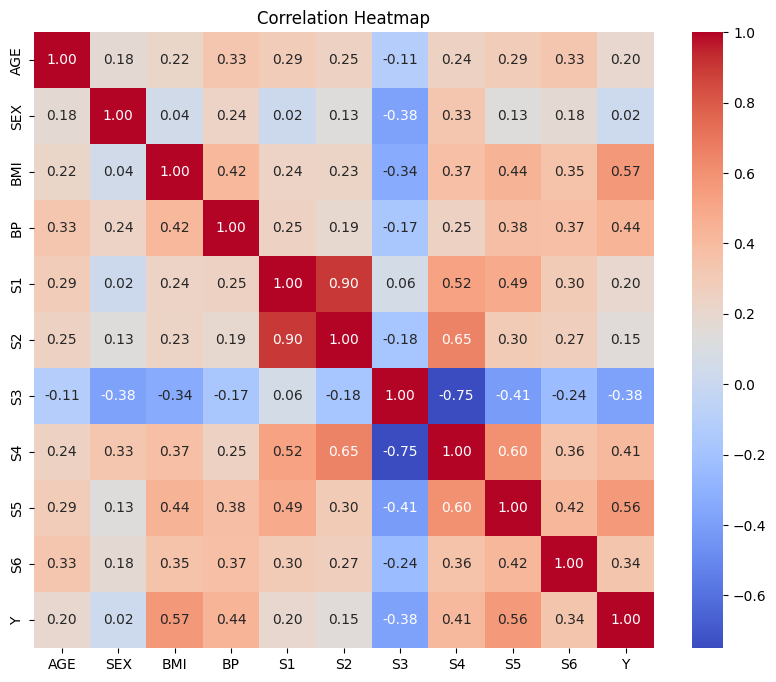

In [9]:
import seaborn as sns
# Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

BMI, S5 will most effect the target variable Y

# Limitations

A correlation heatmap might reveal relationships between features and the target variable, but these correlations do not imply causation. Identifying truly causal relationships requires a more in-depth analysis, often beyond what can be concluded from the dataset alone.

The dataset might require additional feature engineering to capture important relationships and interactions between variables.

Without specific descriptions for columns S1 through S6, there's a risk of misinterpreting these features. Understanding the exact nature of these serum measurements is crucial for accurate analysis.